In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib.pyplot as plt

import sys
sys.path.append("..")  

#for development purposes
%reload_ext autoreload
%autoreload 2

import enlopy as el

## Generate energy loads using monthly and daily profiles for a working and a non-working day

Create random monthly and daily loads

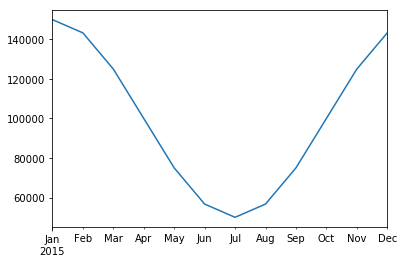

In [2]:
ML  = (np.cos(2 * np.pi/12 * np.linspace(0,11,12)) * 50 + 100 ) * 1000  # monthly load
ML = el.make_timeseries(ML) #convenience wrapper around pd.DataFrame with pd.DateTimeindex
ML.plot()

Create normalized random daily load for a working and non-working day

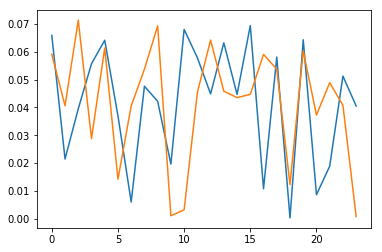

In [3]:
DWL =  np.random.rand(24) * 10 #daily load working
DWL = DWL / DWL.sum() # normalized

DNWL = np.random.rand(24) * 5 #daily load non working
DNWL = DNWL / DNWL.sum() #normalized daily load non working

plt.plot(DNWL)
plt.plot(DWL)

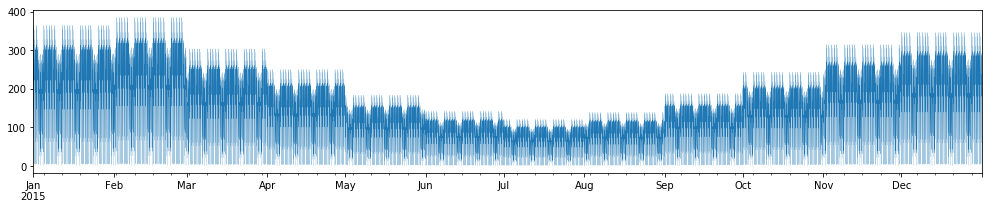

In [4]:
#Define the weighting factor of energy during working and non-working days.
Weight = .55 # i.e energy will be split 55% in working day 45% non working day

Load1 =  el.gen_load_from_daily_monthly(ML, DWL, DNWL, Weight)
Load1.name='House1'
Load1.plot(figsize=(17,3), linewidth =.2, grid = False);

Check if the total sum of energy is the same

In [5]:
print 'error = {:.2f}'.format(Load1.sum() - ML.sum())

error = 0.00


## Reshape (days - hours) and plot heatmap 

In [6]:
el.reshape_timeseries(Load1, x='month', y='hour')

month,1,2,3,4,5,6,7,8,9,10,11,12
hour,,,,,,,,,,,,
0,9123.199773,8711.693434,7602.666477,6067.568622,4576.656325,3440.234339,3031.152505,3459.874672,4550.676466,6082.133182,7610.162006,8687.360082
1,5371.762179,5143.391119,4476.468483,3622.299213,2643.367797,2053.797644,1818.580762,1998.341286,2716.724410,3581.174786,4455.304142,5212.098661
2,9502.115088,9096.910382,7918.429240,6403.066502,4680.427005,3630.457376,3213.879189,3538.323549,4802.299877,6334.743392,7883.267325,9211.059402
3,5332.521476,5078.199800,4443.767897,3497.262219,2725.963258,1982.903256,1738.195346,2060.782056,2622.946664,3555.014317,4473.489530,4981.712017
4,9306.574267,8889.278783,7755.478556,6198.384370,4659.488190,3514.405207,3098.108265,3522.494159,4648.788278,6204.382844,7758.565620,8879.256992
5,2988.761241,2841.599956,2490.634368,1943.650740,1544.887380,1102.025282,962.996989,1167.908695,1457.738055,1992.507494,2515.778086,2759.973834
6,4783.727762,4590.874826,3986.439802,3263.317991,2315.192970,1850.259850,1645.060767,1750.246676,2447.488493,3189.151841,3948.270815,4714.785948
7,7828.817095,7482.872738,6524.014246,5232.333452,3900.843330,2966.666607,2618.537873,2948.971493,3924.250089,5219.211397,6517.261090,7504.796063
8,9376.262227,8973.835409,7813.551856,6309.019355,4627.988442,3577.133838,3165.022378,3498.680884,4731.764516,6250.841485,7783.611103,9071.034539


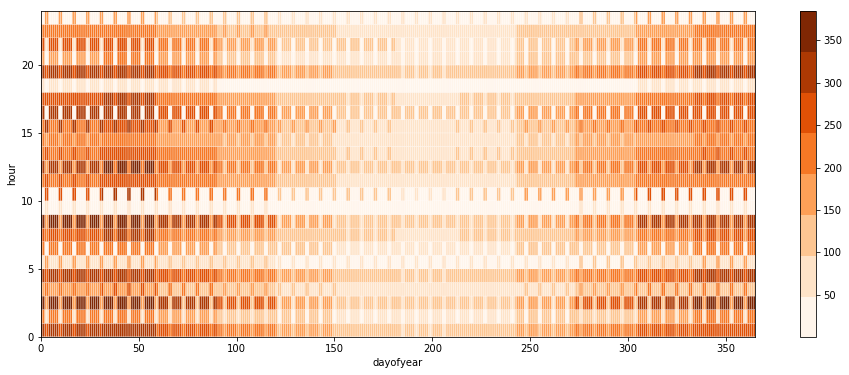

In [7]:
el.plot_heatmap(Load1)

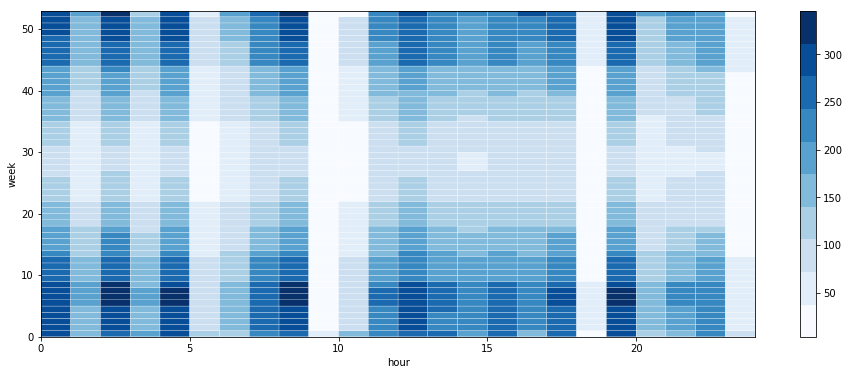

In [8]:
el.plot_heatmap(Load1, x='hour', y='week',bins=10, aggfunc='mean', palette='Blues')

### Plot percentiles

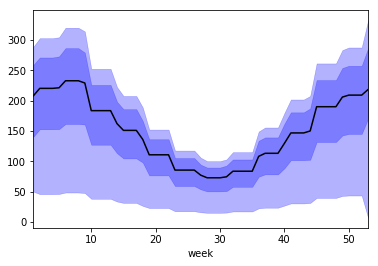

In [9]:
el.plot_percentiles(Load1, x='week', zz='hour')

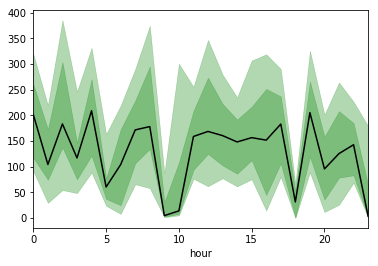

In [10]:
el.plot_percentiles(Load1, x='hour', zz='dayofyear', perc_list=[[1,99], [25,75], 50],color='green')

### 3d plots

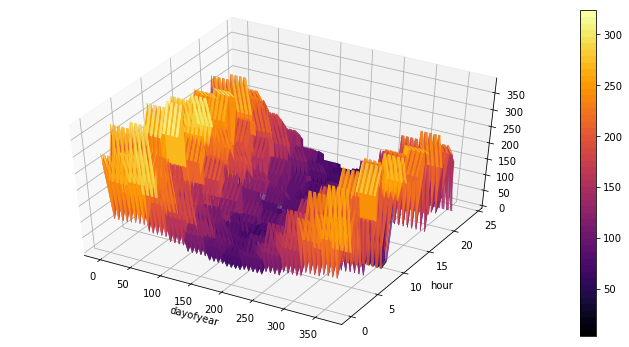

In [11]:
el.plot_3d(Load1, bins=50, palette='inferno')

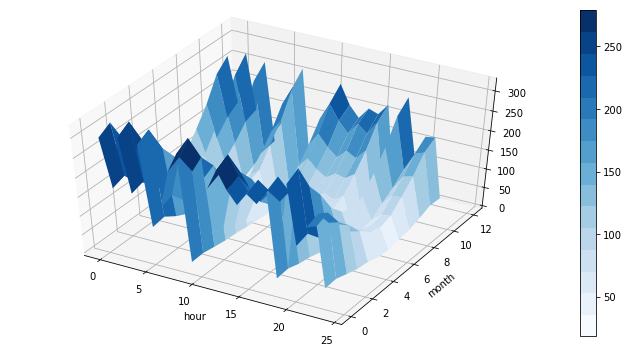

In [12]:
el.plot_3d(Load1, x='hour', y='month', aggfunc='mean', palette='Blues')

### Boxplot

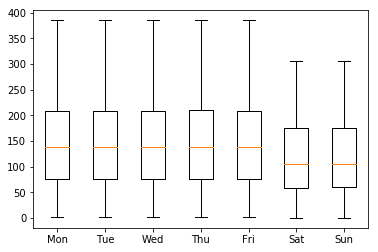

In [13]:
el.plot_boxplot(Load1, by='day')

### Rugplot

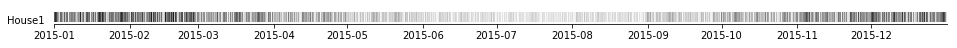

In [14]:
el.plot_rug(Load1, on_off=False, cmap='Greys')

It can accept a dataframe of timeseries and optionally normalize by the maximum value of the whole DataFrame


In [15]:
# Generate dummy dataframe of load profiles
df_many = pd.concat([Load1, 3 * Load1, Load1['Jun 2015':'Nov 2015']], axis=1)
df_many.columns = ['House1', 'House2', 'House3']

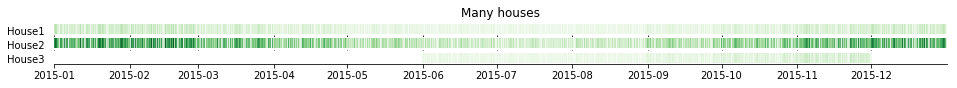

In [16]:
el.plot_rug(df_many, cmap='Greens', fig_title='Many houses', normalized=True)

## Archetypes

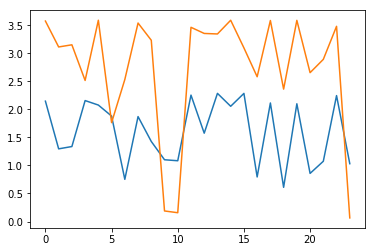

In [17]:
plt.plot(el.get_load_archetypes(Load1,2));

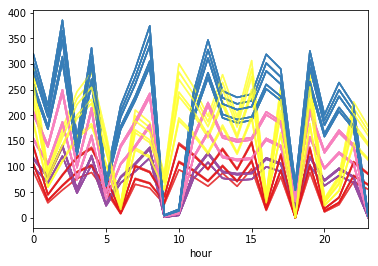

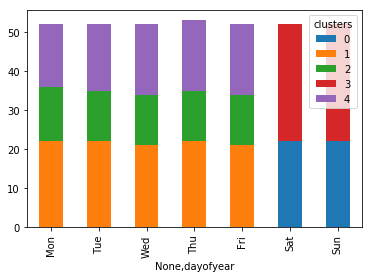

In [18]:
el.get_load_archetypes(Load1, 5, plot_diagnostics=True);

## Get and plot Load Duration Curve of load

In [19]:
el.get_LDC(Load1)

(array([  1.14155251e-04,   2.28310502e-04,   3.42465753e-04, ...,
          9.99771689e-01,   9.99885845e-01,   1.00000000e+00]),
 array([ 385.04163707,  385.04163707,  385.04163707, ...,    0.4205477 ,
           0.4205477 ,    0.4205477 ]))

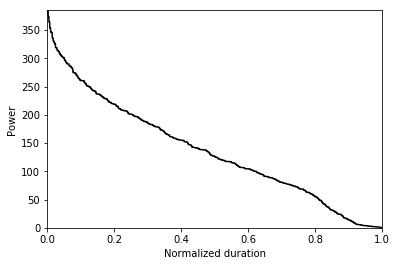

In [20]:
el.plot_LDC(Load1)

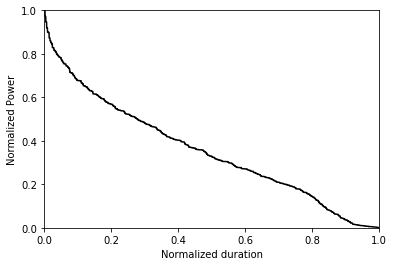

In [21]:
el.plot_LDC(Load1, y_norm=True,cmap='Orange')

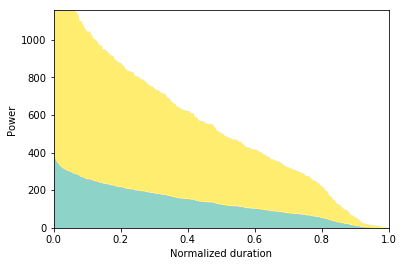

In [22]:
#Works also for 2-D
el.plot_LDC(df_many[['House1', 'House2']])

# Add noise to a load

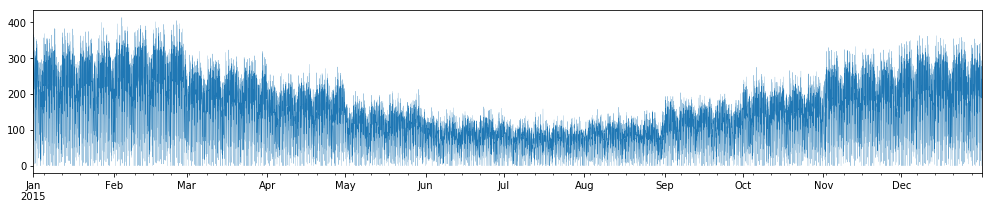

In [23]:
Load1_noise = el.add_noise(Load1, 3, 10) # Gauss Markov noise

fig = plt.figure(figsize=(14,3))

#plt.plot(Load1_noise,linewidth =.3)
Load1_noise.plot(figsize=(17,3), linewidth =.2, grid = False)
Load1_noise.name='Noisy'

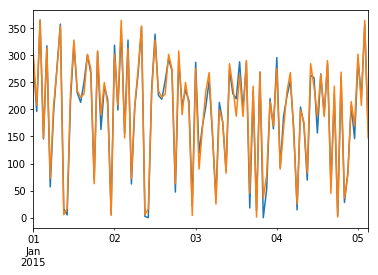

In [24]:
Load1_noise[0:100].plot()
Load1[0:100].plot()

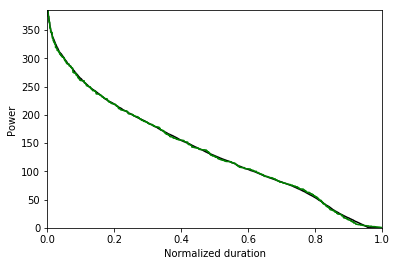

In [25]:
el.plot_LDC(Load1_noise)
el.plot_LDC(Load1, color='g')

## Gather statistics

In [26]:
el.get_load_stats(Load1)

,2015
Average,136.986
Biggest duration of consecutive zero load,0
Load Factor (peakiness),0.35577
Load ratio (max/min),915.572
Max,385.042
Min (2%),0.420548
Periodicity,"(2190.0, 162.0)"
Ramps (98%),"(-240.724317606, 232.798555833)"
Sum,1.2e+06
Total Zero load duration,0


We can also check the statistics per defined time period. Example for month ('m'):

In [27]:
el.get_load_stats(Load1, per='m') 

,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12
Average,201.613,213.246,168.011,138.889,100.806,78.7482,67.2043,76.208,104.167,134.409,173.611,192.609
Biggest duration of consecutive zero load,0,0,0,0,0,0,0,0,0,0,0,0
Load Factor (peakiness),0.553336,0.553826,0.553336,0.555849,0.54991,0.555849,0.556762,0.54991,0.555849,0.553336,0.552308,0.556762
Load ratio (max/min),287.02,287.02,287.02,287.02,287.02,287.02,287.02,287.02,287.02,287.02,287.02,287.02
Max,364.359,385.042,303.632,249.868,183.314,141.672,120.706,138.583,187.401,242.906,314.337,345.945
Min (2%),1.26946,1.34152,1.05788,0.870561,0.638682,0.493597,0.420548,0.482833,0.65292,0.846303,1.09518,1.2053
Periodicity,"(124.0, 21.0)","(112.0, 20.0)","(124.0, 21.0)","(120.0, 21.0)","(124.0, 21.0)","(120.0, 21.0)","(124.0, 21.0)","(124.0, 21.0)","(120.0, 21.0)","(124.0, 21.0)","(120.0, 21.0)","(124.0, 21.0)"
Ramps (98%),"(-348.39532586, 297.894048835)","(-368.172012552, 314.804026765)","(-290.329438217, 248.245040696)","(-238.9207861, 204.288275528)","(-175.283006624, 149.875043261)","(-135.465050972, 115.828857377)","(-115.417118208, 98.6869515628)","(-132.51098444, 113.302994443)","(-179.190589575, 153.216206646)","(-232.263550574, 198.596032557)","(-300.565412, 256.997269695)","(-330.788392816, 282.839310201)"
Sum,150000,143301,125000,100000,75000,56698.7,50000,56698.7,75000,100000,125000,143301
Total Zero load duration,0,0,0,0,0,0,0,0,0,0,0,0


## Load Shifting

In [28]:
Load1_DR = el.gen_demand_response(Load1, 0.15, 0.30)

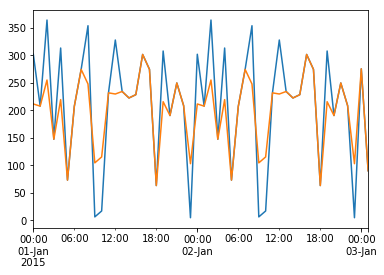

In [29]:
Load1[0:50].plot()
Load1_DR[0:50].plot()

In [30]:
el.get_load_stats(Load1)

,2015
Average,136.986
Biggest duration of consecutive zero load,0
Load Factor (peakiness),0.35577
Load ratio (max/min),915.572
Max,385.042
Min (2%),0.420548
Periodicity,"(2190.0, 162.0)"
Ramps (98%),"(-240.724317606, 232.798555833)"
Sum,1.2e+06
Total Zero load duration,0


In [31]:
el.get_load_stats(Load1_DR) #it is less peaky as expected after the peak shaving

,2015
Average,134.898
Biggest duration of consecutive zero load,0
Load Factor (peakiness),0.423175
Load ratio (max/min),15.3381
Max,318.775
Min (2%),20.7832
Periodicity,"(2190.0, 162.0)"
Ramps (98%),"(-154.779285581, 145.089418622)"
Sum,1.1817e+06
Total Zero load duration,0


## Sample new loads from load duration curve

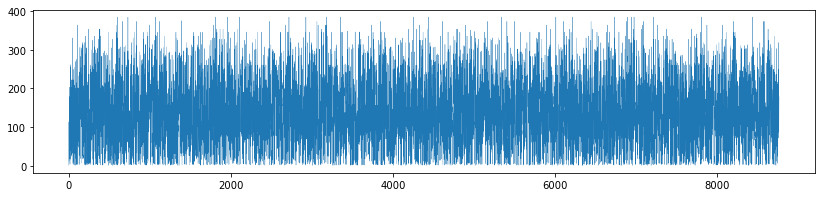

In [32]:
Load1a = el.gen_load_from_LDC(el.get_LDC(Load1))
fig = plt.figure(figsize=(14,3))
plt.plot(Load1a, linewidth =.3)

Check whether they have the same distribution

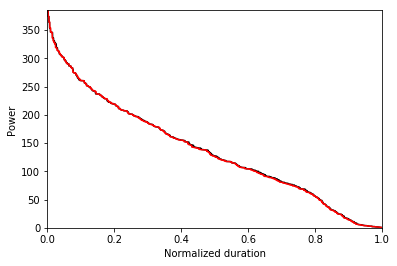

In [33]:
el.plot_LDC(Load1a)
el.plot_LDC(Load1,color='red')